In [1]:
# load the data

import os
import glob 
from matplotlib.pyplot import rc_context
import seaborn as sns
import numpy as np
import pandas as pd
import scanpy as sc
import numpy as np
import matplotlib.pyplot as plt
sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
#sc.logging.print_versions()

import pickle  #upper threshold 값들을 저장하고 불러오기 위해서

In [2]:
# Load the stored data object
save_file = './write/ddk_ctrl.h5ad'
adata_ctrl = sc.read_h5ad(save_file)

# Load the stored data object
save_file = './write/ddk_ko.h5ad'
adata_ko = sc.read_h5ad(save_file)




In [3]:
adata_ko.obs['sample'] = 'ko'

adata_ctrl.obs['sample'] = 'control'

In [4]:
adata = adata_ctrl.concatenate(adata_ko)

In [5]:
adata

AnnData object with n_obs × n_vars = 1983 × 31056
    obs: 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'n_genes', 'n_counts', 'sample', 'batch'
    var: 'gene_ids', 'feature_types', 'mt', 'ribo', 'n_cells_by_counts-0', 'mean_counts-0', 'pct_dropout_by_counts-0', 'total_counts-0', 'n_cells_by_counts-1', 'mean_counts-1', 'pct_dropout_by_counts-1', 'total_counts-1'

In [6]:
# Load the stored data object
save_file = './write/ddk2_pp_merge.h5ad'
adata.write(save_file)


... storing 'sample' as categorical


In [7]:
genes = adata.var.index

In [8]:
genes

Index(['Xkr4', 'Gm1992', 'Gm37381', 'Rp1', 'Sox17', 'Gm37323', 'Mrpl15',
       'Lypla1', 'Gm37988', 'Tcea1',
       ...
       'AC234645.1', 'AC168977.2', 'AC168977.1', 'AC149090.1',
       'CAAA01118383.1', 'Vmn2r122', 'CAAA01147332.1', 'GFP', 'Malat1-1',
       'tdTomato'],
      dtype='object', length=31056)

In [9]:
'Epcam' in genes

True

In [10]:
sc.pp.normalize_per_cell(adata, counts_per_cell_after=1e4)


normalizing by total count per cell
    finished (0:00:00): normalized adata.X and added    'n_counts', counts per cell before normalization (adata.obs)


In [11]:
sc.pp.log1p(adata)


In [12]:
# compute variable genes
sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=3, min_disp=0.5)
print("Highly variable genes: %d"%sum(adata.var.highly_variable))

extracting highly variable genes
    finished (0:00:00)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)
Highly variable genes: 4892


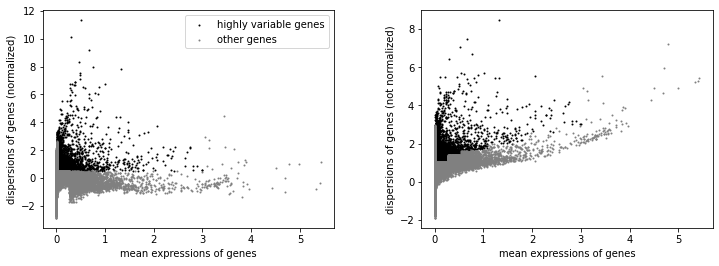

In [13]:
#plot variable genes
sc.pl.highly_variable_genes(adata)

In [14]:
# subset for variable genes in the dataset
adata = adata[:, adata.var['highly_variable']]

In [17]:
adata

View of AnnData object with n_obs × n_vars = 1983 × 4892
    obs: 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'n_genes', 'n_counts', 'sample', 'batch'
    var: 'gene_ids', 'feature_types', 'mt', 'ribo', 'n_cells_by_counts-0', 'mean_counts-0', 'pct_dropout_by_counts-0', 'total_counts-0', 'n_cells_by_counts-1', 'mean_counts-1', 'pct_dropout_by_counts-1', 'total_counts-1', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'log1p', 'hvg'

In [21]:
'Epcam' in genes

True

In [22]:
hvg = adata.var.index

In [24]:
len(hvg)

4892

In [25]:
'Epcam' in hvg

False

In [28]:
adata.var

,gene_ids,feature_types,mt,ribo,n_cells_by_counts-0,mean_counts-0,pct_dropout_by_counts-0,total_counts-0,n_cells_by_counts-1,mean_counts-1,pct_dropout_by_counts-1,total_counts-1,highly_variable,means,dispersions,dispersions_norm
Xkr4,ENSMUSG00000051951,Gene Expression,False,False,14,0.015741,98.703704,17.0,31,0.019453,98.370137,37.0,True,0.031726,1.138187,0.591325
Sox17,ENSMUSG00000025902,Gene Expression,False,False,236,0.671296,78.148148,725.0,191,0.387487,89.957939,737.0,True,0.388977,1.807983,1.234852
4732440D04Rik,ENSMUSG00000090031,Gene Expression,False,False,119,0.136111,88.981481,147.0,144,0.092534,92.429022,176.0,True,0.142949,1.149531,0.604204
Gm30414,ENSMUSG00000103067,Gene Expression,False,False,30,0.038889,97.222222,42.0,48,0.031020,97.476341,59.0,True,0.037127,1.087139,0.533373
Prex2,ENSMUSG00000048960,Gene Expression,False,False,118,0.316667,89.074074,342.0,207,0.388013,89.116719,738.0,True,0.363664,1.757912,1.138768
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
mt-Nd5,ENSMUSG00000064367,Gene Expression,True,False,986,18.613890,8.703704,20103.0,1813,17.343849,4.679285,32988.0,True,2.890681,3.194013,0.853452
AC168977.2,ENSMUSG00000094915,Gene Expression,False,False,4,0.005556,99.629630,6.0,7,0.004206,99.631966,8.0,True,0.014565,2.466553,2.099361
AC149090.1,ENSMUSG00000095041,Gene Expression,False,False,648,2.869444,40.000000,3099.0,905,2.046267,52.418507,3892.0,True,1.493222,2.019483,0.568570
CAAA01147332.1,ENSMUSG00000095742,Gene Expression,False,False,38,0.036111,96.481481,39.0,81,0.043638,95.741325,83.0,True,0.070116,1.775017,1.314291


In [34]:
adata.var.values

array([['ENSMUSG00000051951', 'Gene Expression', False, ...,
        0.03172601078052352, 1.1381870826668925, 0.5913254618644714],
       ['ENSMUSG00000025902', 'Gene Expression', False, ...,
        0.38897683859209414, 1.8079829527438678, 1.2348517179489136],
       ['ENSMUSG00000090031', 'Gene Expression', False, ...,
        0.1429487911997902, 1.1495311685932643, 0.6042039394378662],
       ...,
       ['ENSMUSG00000095041', 'Gene Expression', False, ...,
        1.4932223871261352, 2.0194832288765485, 0.5685702562332153],
       ['ENSMUSG00000095742', 'Gene Expression', False, ...,
        0.07011551917087604, 1.7750171220085718, 1.3142905235290527],
       ['tdTomato', 'Gene Expression', False, ..., 0.44774900928704586,
        1.5626844153908337, 0.7641355991363525]], dtype=object)

In [38]:
adata.var.iloc[:1,:9]

,gene_ids,feature_types,mt,ribo,n_cells_by_counts-0,mean_counts-0,pct_dropout_by_counts-0,total_counts-0,n_cells_by_counts-1
Xkr4,ENSMUSG00000051951,Gene Expression,False,False,14,0.015741,98.703704,17.0,31


In [49]:
gene = adata.var.iloc[5:9,:].index

In [50]:
gene[0]

'Sulf1'

In [52]:
'Sulf1' in gene

True

In [53]:
save_file = './write/ddk2_pp_merge.h5ad'
adata_raw = sc.read_h5ad(save_file)

In [68]:
adata_raw.var.loc['Epcam':,:]

,gene_ids,feature_types,mt,ribo,n_cells_by_counts-0,mean_counts-0,pct_dropout_by_counts-0,total_counts-0,n_cells_by_counts-1,mean_counts-1,pct_dropout_by_counts-1,total_counts-1
Epcam,ENSMUSG00000045394,Gene Expression,False,False,815,19.712963,24.537037,21290.0,1139,18.358570,40.115668,34918.0
Msh2,ENSMUSG00000024151,Gene Expression,False,False,247,0.382407,77.129630,413.0,394,0.330179,79.284963,628.0
Kcnk12,ENSMUSG00000050138,Gene Expression,False,False,1,0.000926,99.907407,1.0,0,0.000000,100.000000,0.0
Rpl36-ps4,ENSMUSG00000093922,Gene Expression,False,True,1,0.000926,99.907407,1.0,3,0.001577,99.842271,3.0
Msh6,ENSMUSG00000005370,Gene Expression,False,False,88,0.109259,91.851852,118.0,165,0.111987,91.324921,213.0
...,...,...,...,...,...,...,...,...,...,...,...,...
Vmn2r122,ENSMUSG00000096730,Gene Expression,False,False,0,0.000000,100.000000,0.0,0,0.000000,100.000000,0.0
CAAA01147332.1,ENSMUSG00000095742,Gene Expression,False,False,38,0.036111,96.481481,39.0,81,0.043638,95.741325,83.0
GFP,GFP,Gene Expression,False,False,0,0.000000,100.000000,0.0,0,0.000000,100.000000,0.0
Malat1-1,Malat1,Gene Expression,False,False,282,0.399074,73.888889,431.0,338,0.254469,82.229232,484.0


In [58]:
adata.var['Epcam':3]

,gene_ids,feature_types,mt,ribo,n_cells_by_counts-0,mean_counts-0,pct_dropout_by_counts-0,total_counts-0,n_cells_by_counts-1,mean_counts-1,pct_dropout_by_counts-1,total_counts-1,highly_variable,means,dispersions,dispersions_norm
Sox17,ENSMUSG00000025902,Gene Expression,False,False,236,0.671296,78.148148,725.0,191,0.387487,89.957939,737.0,True,0.388977,1.807983,1.234852
4732440D04Rik,ENSMUSG00000090031,Gene Expression,False,False,119,0.136111,88.981481,147.0,144,0.092534,92.429022,176.0,True,0.142949,1.149531,0.604204
